In [2]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras import models, layers, optimizers, utils
from tensorflow.keras.optimizers import Adam

In [4]:
data = pd.read_csv("diabetes.csv")

In [5]:
data.shape

(768, 9)

In [6]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
 # check if any null value is present?
data.isnull().values.any()

False

# Visulazing Outcome¶

In [12]:
a = data.Outcome.value_counts()

In [13]:
a # here "1" represent diabetic patients.
  # "0" represent non_diabetic patients.

0    500
1    268
Name: Outcome, dtype: int64

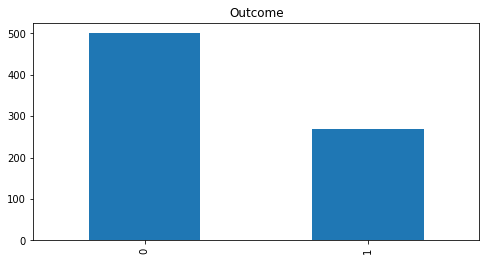

In [14]:
plt.figure(figsize=(8, 4))
a.plot(kind="bar",title ="Outcome")

# Train_Test_Split

In [16]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values

In [17]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [18]:
Y[:100]

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

In [46]:

X_train.shape

(537, 8)

In [47]:

X_test.shape

(231, 8)

# Check how many other missing(zero) values

In [48]:
print("total number of rows : {0}".format(len(data)))
print("number of rows missing glucose_conc: {0}".format(len(data.loc[data['Glucose'] == 0])))
#print("number of rows missing glucose_conc: {0}".format(len(data.loc[data['glucose_conc'] == 0])))
print("number of rows missing diastolic_bp: {0}".format(len(data.loc[data['BloodPressure'] == 0])))
print("number of rows missing insulin: {0}".format(len(data.loc[data['Insulin'] == 0])))
print("number of rows missing bmi: {0}".format(len(data.loc[data['BMI'] == 0])))
print("number of rows missing diab_pred: {0}".format(len(data.loc[data['DiabetesPedigreeFunction'] == 0])))
print("number of rows missing age: {0}".format(len(data.loc[data['Age'] == 0])))
print("number of rows missing skin: {0}".format(len(data.loc[data['SkinThickness'] == 0])))

total number of rows : 768
number of rows missing glucose_conc: 5
number of rows missing diastolic_bp: 35
number of rows missing insulin: 374
number of rows missing bmi: 11
number of rows missing diab_pred: 0
number of rows missing age: 0
number of rows missing skin: 227


In [49]:
from sklearn.preprocessing import Imputer

#fill_values = Imputer(missing_values=0, strategy="mean", axis=0)

#X_train = fill_values.fit_transform(X_train)
#X_test = fill_values.fit_transform(X_test)

# Building model

In [50]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(50, activation='relu', input_shape=(X.shape[1],)))
    model.add(layers.Dense(40, activation='sigmoid'))
    model.add(layers.Dense(1))
# compile step
    model.compile(optimizer="rmsprop", loss='binary_crossentropy', metrics=['accuracy'])
  
    return model

In [51]:
model = build_model()

# Training the network

In [52]:
network = model.fit(X_train, Y_train, epochs=600, batch_size=120)#the batch size is the number of samples

Train on 537 samples
Epoch 1/600
537/537 [==============================] - 2s 3ms/sample - loss: 2.7612 - accuracy: 0.6555
Epoch 2/600
537/537 [==============================] - 0s 103us/sample - loss: 0.9289 - accuracy: 0.6387
Epoch 3/600
537/537 [==============================] - 0s 95us/sample - loss: 0.6606 - accuracy: 0.6909
Epoch 4/600
537/537 [==============================] - ETA: 0s - loss: 0.6598 - accuracy: 0.69 - 0s 95us/sample - loss: 0.6827 - accuracy: 0.7132
Epoch 5/600
537/537 [==============================] - 0s 97us/sample - loss: 0.6494 - accuracy: 0.6965
Epoch 6/600
537/537 [==============================] - 0s 88us/sample - loss: 0.6471 - accuracy: 0.7095
Epoch 7/600
537/537 [==============================] - 0s 82us/sample - loss: 0.6556 - accuracy: 0.6983
Epoch 8/600
537/537 [==============================] - 0s 84us/sample - loss: 0.6661 - accuracy: 0.6890
Epoch 9/600
537/537 [==============================] - 0s 75us/sample - loss: 0.6481 - accuracy: 0.6834
E

537/537 [==============================] - 0s 67us/sample - loss: 0.4847 - accuracy: 0.7374
Epoch 78/600
537/537 [==============================] - 0s 73us/sample - loss: 0.4828 - accuracy: 0.7393
Epoch 79/600
537/537 [==============================] - 0s 71us/sample - loss: 0.4749 - accuracy: 0.7561
Epoch 80/600
537/537 [==============================] - 0s 76us/sample - loss: 0.5068 - accuracy: 0.7542
Epoch 81/600
537/537 [==============================] - 0s 78us/sample - loss: 0.4880 - accuracy: 0.7430
Epoch 82/600
537/537 [==============================] - 0s 71us/sample - loss: 0.5089 - accuracy: 0.7412
Epoch 83/600
537/537 [==============================] - 0s 73us/sample - loss: 0.5035 - accuracy: 0.7412
Epoch 84/600
537/537 [==============================] - 0s 69us/sample - loss: 0.4833 - accuracy: 0.7412
Epoch 85/600
537/537 [==============================] - 0s 71us/sample - loss: 0.5122 - accuracy: 0.7486
Epoch 86/600
537/537 [==============================] - 0s 82us/samp

537/537 [==============================] - 0s 67us/sample - loss: 0.5698 - accuracy: 0.7393
Epoch 155/600
537/537 [==============================] - 0s 67us/sample - loss: 0.4403 - accuracy: 0.7840
Epoch 156/600
537/537 [==============================] - 0s 69us/sample - loss: 0.4633 - accuracy: 0.7691
Epoch 157/600
537/537 [==============================] - ETA: 0s - loss: 0.4667 - accuracy: 0.74 - 0s 69us/sample - loss: 0.4517 - accuracy: 0.7691
Epoch 158/600
537/537 [==============================] - 0s 69us/sample - loss: 0.4348 - accuracy: 0.7803
Epoch 159/600
537/537 [==============================] - 0s 73us/sample - loss: 0.4450 - accuracy: 0.7747
Epoch 160/600
537/537 [==============================] - 0s 65us/sample - loss: 0.4963 - accuracy: 0.7430
Epoch 161/600
537/537 [==============================] - 0s 73us/sample - loss: 0.4464 - accuracy: 0.7877
Epoch 162/600
537/537 [==============================] - 0s 71us/sample - loss: 0.4332 - accuracy: 0.8007
Epoch 163/600
537/

537/537 [==============================] - 0s 67us/sample - loss: 0.4840 - accuracy: 0.7914
Epoch 232/600
537/537 [==============================] - 0s 65us/sample - loss: 0.4215 - accuracy: 0.7970
Epoch 233/600
537/537 [==============================] - 0s 80us/sample - loss: 0.6061 - accuracy: 0.7542
Epoch 234/600
537/537 [==============================] - 0s 63us/sample - loss: 0.4382 - accuracy: 0.7803
Epoch 235/600
537/537 [==============================] - 0s 67us/sample - loss: 0.4251 - accuracy: 0.7803
Epoch 236/600
537/537 [==============================] - 0s 69us/sample - loss: 0.4204 - accuracy: 0.7914
Epoch 237/600
537/537 [==============================] - 0s 73us/sample - loss: 0.4145 - accuracy: 0.8007
Epoch 238/600
537/537 [==============================] - 0s 67us/sample - loss: 0.4217 - accuracy: 0.7933
Epoch 239/600
537/537 [==============================] - 0s 69us/sample - loss: 0.4280 - accuracy: 0.7691
Epoch 240/600
537/537 [==============================] - 0s 

537/537 [==============================] - 0s 71us/sample - loss: 0.5310 - accuracy: 0.7728
Epoch 308/600
537/537 [==============================] - 0s 65us/sample - loss: 0.4142 - accuracy: 0.7952
Epoch 309/600
537/537 [==============================] - 0s 63us/sample - loss: 0.4032 - accuracy: 0.7803
Epoch 310/600
537/537 [==============================] - 0s 86us/sample - loss: 0.3981 - accuracy: 0.7896
Epoch 311/600
537/537 [==============================] - 0s 75us/sample - loss: 0.4245 - accuracy: 0.8007
Epoch 312/600
537/537 [==============================] - 0s 67us/sample - loss: 0.3937 - accuracy: 0.8026
Epoch 313/600
537/537 [==============================] - 0s 76us/sample - loss: 0.3880 - accuracy: 0.8045
Epoch 314/600
537/537 [==============================] - 0s 65us/sample - loss: 0.4085 - accuracy: 0.7877
Epoch 315/600
537/537 [==============================] - 0s 76us/sample - loss: 0.4135 - accuracy: 0.8063
Epoch 316/600
537/537 [==============================] - 0s 

537/537 [==============================] - 0s 67us/sample - loss: 0.3647 - accuracy: 0.8212
Epoch 385/600
537/537 [==============================] - 0s 71us/sample - loss: 0.3849 - accuracy: 0.8007
Epoch 386/600
537/537 [==============================] - 0s 67us/sample - loss: 0.4623 - accuracy: 0.7952
Epoch 387/600
537/537 [==============================] - 0s 71us/sample - loss: 0.4250 - accuracy: 0.7840
Epoch 388/600
537/537 [==============================] - 0s 73us/sample - loss: 0.3787 - accuracy: 0.8063
Epoch 389/600
537/537 [==============================] - 0s 69us/sample - loss: 0.3684 - accuracy: 0.8082
Epoch 390/600
537/537 [==============================] - 0s 76us/sample - loss: 0.3737 - accuracy: 0.8026
Epoch 391/600
537/537 [==============================] - 0s 67us/sample - loss: 0.3851 - accuracy: 0.8231
Epoch 392/600
537/537 [==============================] - 0s 73us/sample - loss: 0.3824 - accuracy: 0.7989
Epoch 393/600
537/537 [==============================] - 0s 

537/537 [==============================] - 0s 69us/sample - loss: 0.3617 - accuracy: 0.8175
Epoch 462/600
537/537 [==============================] - ETA: 0s - loss: 0.3736 - accuracy: 0.80 - 0s 73us/sample - loss: 0.3686 - accuracy: 0.8045
Epoch 463/600
537/537 [==============================] - 0s 73us/sample - loss: 0.3455 - accuracy: 0.8175
Epoch 464/600
537/537 [==============================] - 0s 71us/sample - loss: 0.4175 - accuracy: 0.8156
Epoch 465/600
537/537 [==============================] - 0s 76us/sample - loss: 0.3657 - accuracy: 0.8101
Epoch 466/600
537/537 [==============================] - 0s 73us/sample - loss: 0.3572 - accuracy: 0.8194
Epoch 467/600
537/537 [==============================] - 0s 75us/sample - loss: 0.4156 - accuracy: 0.8138
Epoch 468/600
537/537 [==============================] - 0s 71us/sample - loss: 0.3600 - accuracy: 0.8305
Epoch 469/600
537/537 [==============================] - 0s 69us/sample - loss: 0.3560 - accuracy: 0.8194
Epoch 470/600
537/

537/537 [==============================] - 0s 71us/sample - loss: 0.3378 - accuracy: 0.8343
Epoch 537/600
537/537 [==============================] - 0s 71us/sample - loss: 0.4038 - accuracy: 0.8194
Epoch 538/600
537/537 [==============================] - 0s 69us/sample - loss: 0.3472 - accuracy: 0.8268
Epoch 539/600
537/537 [==============================] - ETA: 0s - loss: 0.3303 - accuracy: 0.82 - 0s 71us/sample - loss: 0.3291 - accuracy: 0.8287
Epoch 540/600
537/537 [==============================] - 0s 73us/sample - loss: 0.3567 - accuracy: 0.8119
Epoch 541/600
537/537 [==============================] - 0s 80us/sample - loss: 0.4712 - accuracy: 0.7654
Epoch 542/600
537/537 [==============================] - 0s 80us/sample - loss: 0.3380 - accuracy: 0.8268
Epoch 543/600
537/537 [==============================] - 0s 75us/sample - loss: 0.3191 - accuracy: 0.8343
Epoch 544/600
537/537 [==============================] - 0s 76us/sample - loss: 0.3367 - accuracy: 0.8343
Epoch 545/600
537/

In [53]:
#history = model_1.fit(X_train,Y_train,epochs=100, test_data =(X_test, Y_test))

# Evaluating the network

In [58]:
test_loss, test_acc = model.evaluate(X_test,Y_test,verbose=0)
print("test_acc::",test_acc) 

test_acc:: 0.6753247


#   Saving our model¶

In [59]:
model.save('diabetes.h5')

In [61]:
model.load_weights('diabetes.h5')